In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("us-counties-2020.csv")

In [47]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [48]:
df['date'].head()

0    2020-01-21
1    2020-01-22
2    2020-01-23
3    2020-01-24
4    2020-01-24
Name: date, dtype: object

In [49]:
df.loc[lambda df: df['county'] == 'Unknown',: ]

,date,county,state,fips,cases,deaths
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
485,2020-03-03,Unknown,Rhode Island,NaN,2,0.0
522,2020-03-04,Unknown,Rhode Island,NaN,2,0.0
569,2020-03-05,Unknown,Rhode Island,NaN,2,0.0
...,...,...,...,...,...,...
883891,2020-12-31,Unknown,Puerto Rico,NaN,3875,1503.0
883903,2020-12-31,Unknown,Rhode Island,NaN,9622,60.0
884104,2020-12-31,Unknown,Tennessee,NaN,6903,59.0
884391,2020-12-31,Unknown,Utah,NaN,430,2.0


In [50]:
df.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [51]:
df['date'] = pd.to_datetime(df['date'])

In [52]:
grouped_data = df.groupby(  [df["date"].dt.month, "state"])["deaths"].sum()

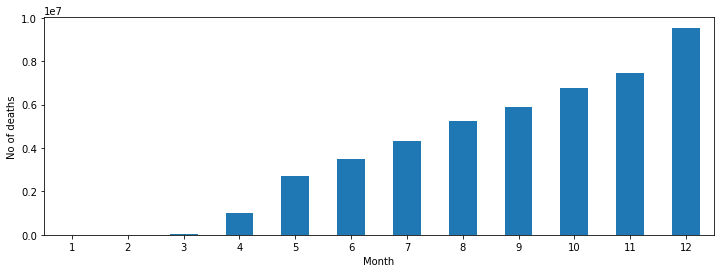

In [73]:
 fig, axs = plt.subplots(figsize=(12, 4))

 df.groupby(df["date"].dt.month)["deaths"].sum().plot(
     kind='bar', rot=0, ax=axs
 )
 

 plt.xlabel("Month");  # custom x label using Matplotlib

 plt.ylabel("No of deaths");

In [54]:
march = grouped_data[3].nlargest(3)
april = grouped_data[4].nlargest(3)
may = grouped_data[4].nlargest(3)
june = grouped_data[4].nlargest(3)

In [55]:
print("MARCH\n", march,"\nAPRIL\n", april,"\nMAY\n", may,"\nJUNE\n", june)

MARCH
 state
New York      7943.0
Washington    2377.0
New Jersey    1165.0
Name: deaths, dtype: float64 
APRIL
 state
New York      425198.0
New Jersey    102708.0
Michigan       59519.0
Name: deaths, dtype: float64 
MAY
 state
New York      425198.0
New Jersey    102708.0
Michigan       59519.0
Name: deaths, dtype: float64 
JUNE
 state
New York      425198.0
New Jersey    102708.0
Michigan       59519.0
Name: deaths, dtype: float64


In [56]:
march_text = "State #1: New York - "   + str(march[0])+ ", " + str("{:.2f}".format((march[0]/march.sum())*100) )+ " '%' of total U.S deaths" + "\n" +"State #2: Washington - " + str(march[1])+ ", " + str("{:.2f}".format((march[1]/march.sum())*100)) + " '%' of total U.S deaths" + "\n" + "State #3: New Jersey - " + str(march[2])+ ", " + str("{:.2f}".format((march[2]/march.sum())*100) ) + " '%' of total U.S deaths"

In [57]:
april_text = "State #1: New York - "   + str(april[0])+ ", " + str("{:.2f}".format((april[0]/(march.sum()+april.sum()))*100) ) + " '%' of total U.S deaths" +"\n" +"State #2: Washington - " + str(april[1])+ ", " + str("{:.2f}".format((april[1]/(march.sum()+april.sum()))*100)) + " '%' of total U.S deaths" + "\n" + "State #3: New Jersey - " + str(april[2])+ ", " + str("{:.2f}".format((april[2]/(march.sum()+april.sum()))*100) ) + " '%' of total U.S deaths"

In [58]:
may_text = "State #1: New York - "   + str(may[0])+ ", " + str("{:.2f}".format((may[0]/(march.sum()+april.sum()+may.sum()))*100) )+ " '%' of total U.S deaths" + "\n" +"State #2: Washington - " + str(may[1])+ ", " + str("{:.2f}".format((may[1]/(march.sum()+april.sum()+may.sum()))*100)) + " '%' of total U.S deaths" + "\n" + "State #3: New Jersey - " + str(may[2])+ ", " + str("{:.2f}".format((may[2]/(march.sum()+april.sum()+may.sum()))*100) ) + " '%' of total U.S deaths"

In [59]:
june_text = "State #1: New York - "   + str(june[0])+ ", " + str("{:.2f}".format((june[0]/(march.sum()+april.sum()+april.sum()+june.sum()))*100) )+" '%' of total U.S deaths" + "\n" +"State #2: New Jersey - " + str(june[1])+ ", " + str("{:.2f}".format((june[1]/(march.sum()+april.sum()+april.sum()+june.sum()))*100)) + " '%' of total U.S deaths" + "\n" + "State #3: Michigan - " + str(june[2])+ ", " + str("{:.2f}".format((june[2]/(march.sum()+april.sum()+april.sum()+june.sum()))*100) ) + " '%' of total U.S deaths"

In [60]:
text_list = []
text_list.extend([march_text, april_text, may_text, june_text])

In [74]:
import getpass
import calendar
import smtplib, ssl

In [62]:
pip install schedule

In [118]:
email_count = 0
email_index = 0
def sendMail():
    smtp_server = "smtp.gmail.com"
    port = 587                                    # For starttls
    sender_email = "chhavibhadana15@gmail.com"               #sender's mail id
    receiver_email  = ['chhavi050btmae19@igdtuw.ac.in']        #list of reciever's mail ids
    #password = getpass.getpass(prompt="Type your password and press enter: ")
    password = "hvkwqwhofgmlwnfz"

    print('Runnning\n')
    
    
    
    global email_index
    global email_count
    
    
    #file1 = open(r'''C:/Users/Chhavi Bhadana/Downloads/data.txt''')
    #number = file1.read()
    #file1.close()
    
    #writing email subject and text
    m = email_index + 3
    
    subject="Top 3 deaths for the month of " + calendar.month_name[m]
    
    text = "Month - " + calendar.month_name[m] + "\n" + text_list[email_index]
    
    message = 'Subject: {}\n\n{}'.format(subject, text)
    
    # Create a secure SSL context
    context = ssl.create_default_context()

    # Try to log in to server and send email
    try:
        server = smtplib.SMTP(smtp_server,port)
        server.ehlo()                               # Can be omitted
        server.starttls(context=context)            # Secure the connection
        server.ehlo()                               
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)
        
        email_index = (email_index + 1) % len(text_list)
        email_count += 1
        
        #file1 = open('''C:/Users/Chhavi Bhadana/Downloads/data.txt''',"w")  
        #number = file1.write(str(int(number)+1)) 
        #file1.close() 
    
    except Exception as e:
        print(e)
        
import time
from apscheduler.schedulers.background import BackgroundScheduler
from apscheduler.triggers.interval import IntervalTrigger

scheduler = BackgroundScheduler(timezone='utc')

scheduler.add_job(sendMail, IntervalTrigger(minutes=1), max_instances=4)

scheduler.start()

while email_count < 4:
    time.sleep(1)

scheduler.shutdown()

Runnning

Runnning

Runnning

Runnning

